## 1. Датасет "Iris Species"
Мы проводим исследование датасета для разведочного анализа данных и тестирования простых моделей прогнозирования. Датасет содержит 150 строк и 6 колонок.

Ссылка на датасет: https://www.kaggle.com/datasets/uciml/iris

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

In [4]:
df = pd.read_csv('Iris.csv')

## 2. Анализ датасета

In [20]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [22]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [23]:
display(data.head())
display(data.tail())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [24]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
data.shape

(150, 5)

In [26]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


Поскольку у нас есть только числовые признаки в Iris dataset, мы можем сразу перейти к анализу

In [28]:
# Числовые признаки
num_feats = iris.feature_names
cat_feats = []  # В данном наборе данных нет категориальных признаков

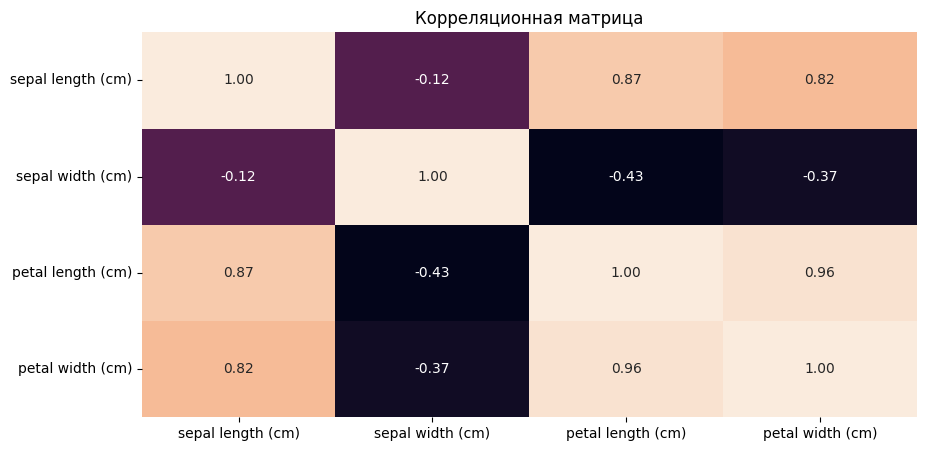

In [29]:
# Визуализация корреляций
plt.figure(figsize=(10, 5))
sns.heatmap(data[num_feats].corr(method='pearson'), annot=True, fmt='.2f', cbar=False)
plt.title('Корреляционная матрица')
plt.show()

## 3. Машинное обучение
### 3.1. Разделение выборки

In [30]:
# Разделение данных на обучающую и тестовую выборку
X = data.drop(['target'], axis=1)
y = data['target']

### 3.2. Масштабирование данных

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [32]:
# Пайплайны для числовых и категориальных признаков
num_pipeline = Pipeline([("scaling", RobustScaler())])
cat_pipeline = Pipeline([("onehot", OneHotEncoder())]) 

In [33]:
preprocessor = ColumnTransformer(
    [
        ("numerical", num_pipeline, num_feats),
    ],
    remainder="passthrough",
)

In [34]:
process_pipeline = Pipeline([("preprocessor", preprocessor)])

X_train_scaled = process_pipeline.fit_transform(X_train)
X_test_scaled = process_pipeline.transform(X_test)

### 3.3. Обучение модели
### 3.3.1. Случайный лес

In [37]:
# Обучение моделей
rf_cl = RandomForestClassifier(random_state=10, n_jobs=-1)
rf_cl.fit(X_train_scaled, y_train)


RandomForestClassifier(n_jobs=-1, random_state=10)

### 3.3.2. Сверхслучайные деревья

In [38]:
et_cl = ExtraTreesClassifier(random_state=10, n_jobs=-1)
et_cl.fit(X_train_scaled, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=10)

### 3.3.3. AdaBoost

In [39]:
ab_cl = AdaBoostClassifier(random_state=10)
ab_cl.fit(X_train_scaled, y_train)

AdaBoostClassifier(random_state=10)

### 3.3.4. Градиентный бустинг

In [41]:
gb_cl = GradientBoostingClassifier(loss="log_loss", random_state=10)
gb_cl.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=10)

## 4. Оценка качества моделей

In [42]:
# Оценка качества моделей
y_pred_rf = rf_cl.predict(X_test_scaled)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [43]:
y_pred_et = et_cl.predict(X_test_scaled)
print("Extra Trees Classification Report:\n", classification_report(y_test, y_pred_et))

Extra Trees Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [44]:
y_pred_ab = ab_cl.predict(X_test_scaled)
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_ab))

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [45]:
y_pred_gb = gb_cl.predict(X_test_scaled)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



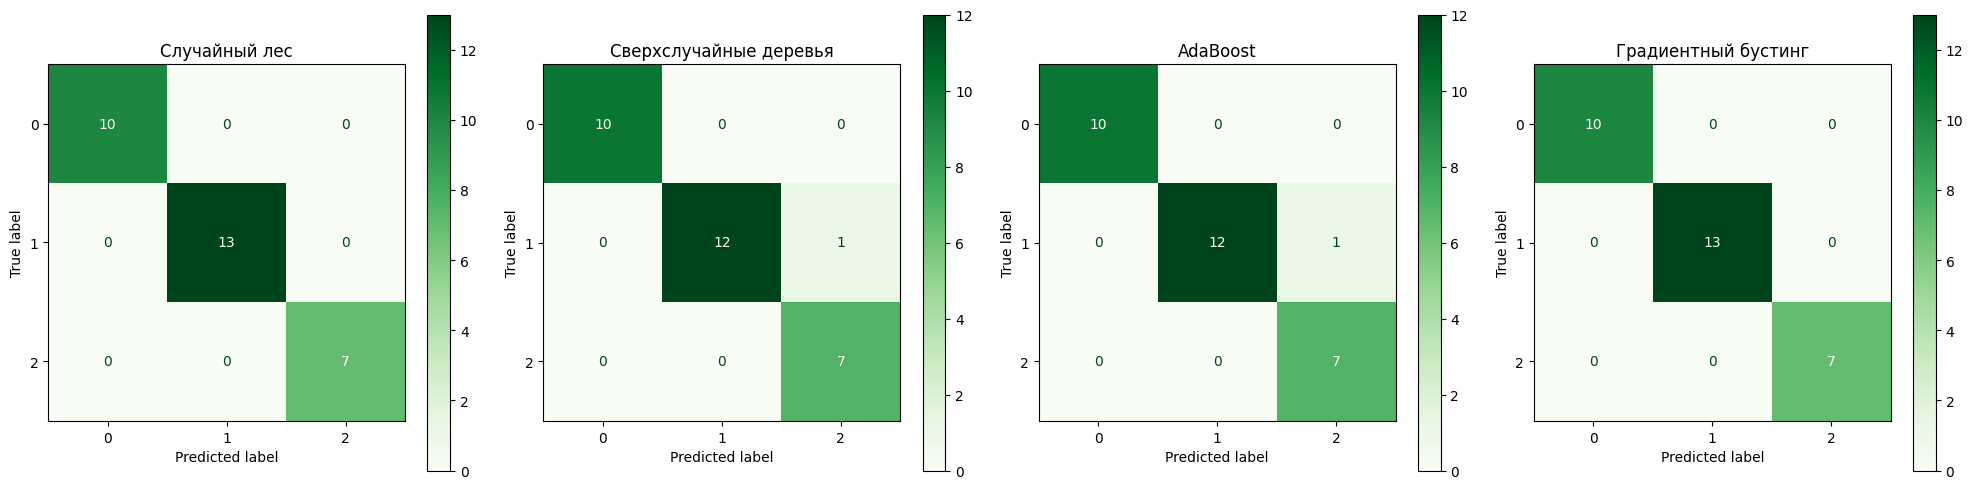

In [57]:
# Матрицы путаницы
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_et = confusion_matrix(y_test, y_pred_et)  
cm_ab = confusion_matrix(y_test, y_pred_ab) 
cm_gb = confusion_matrix(y_test, y_pred_gb) 

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp1.plot(ax=axes[0], cmap=plt.cm.Greens)
axes[0].set_title('Случайный лес')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_et)
disp2.plot(ax=axes[1], cmap=plt.cm.Greens)
axes[1].set_title('Сверхслучайные деревья')

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm_ab)
disp3.plot(ax=axes[2], cmap=plt.cm.Greens)
axes[2].set_title('AdaBoost')

disp4 = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp4.plot(ax=axes[3], cmap=plt.cm.Greens)
axes[3].set_title('Градиентный бустинг')

plt.tight_layout()
plt.show()